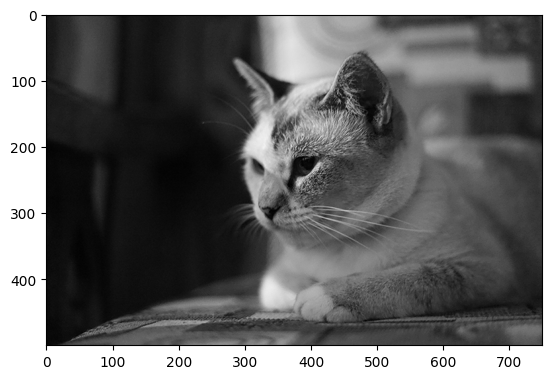

In [2]:
# PROGRRAM KONVERSI RGB KE GRAYSCALE #

# Memanggil modul Pyhton Image Library sebagai pil dengan menggunakan Image dan ImageOps\
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
# Membuat variabel citraAsli untuk menjadi wadah gamabr yang akan dikonversi;
citraAsli = Image.open("Kucing.jpg")
# Melakukan konversi RGB ke Grayscale dengan fungsi ImageOps.grayscale()
citraHP = ImageOps.grayscale(citraAsli)
citraHP.save('Kucing_Gray.jpg')
plt.imshow(citraHP, cmap='gray')

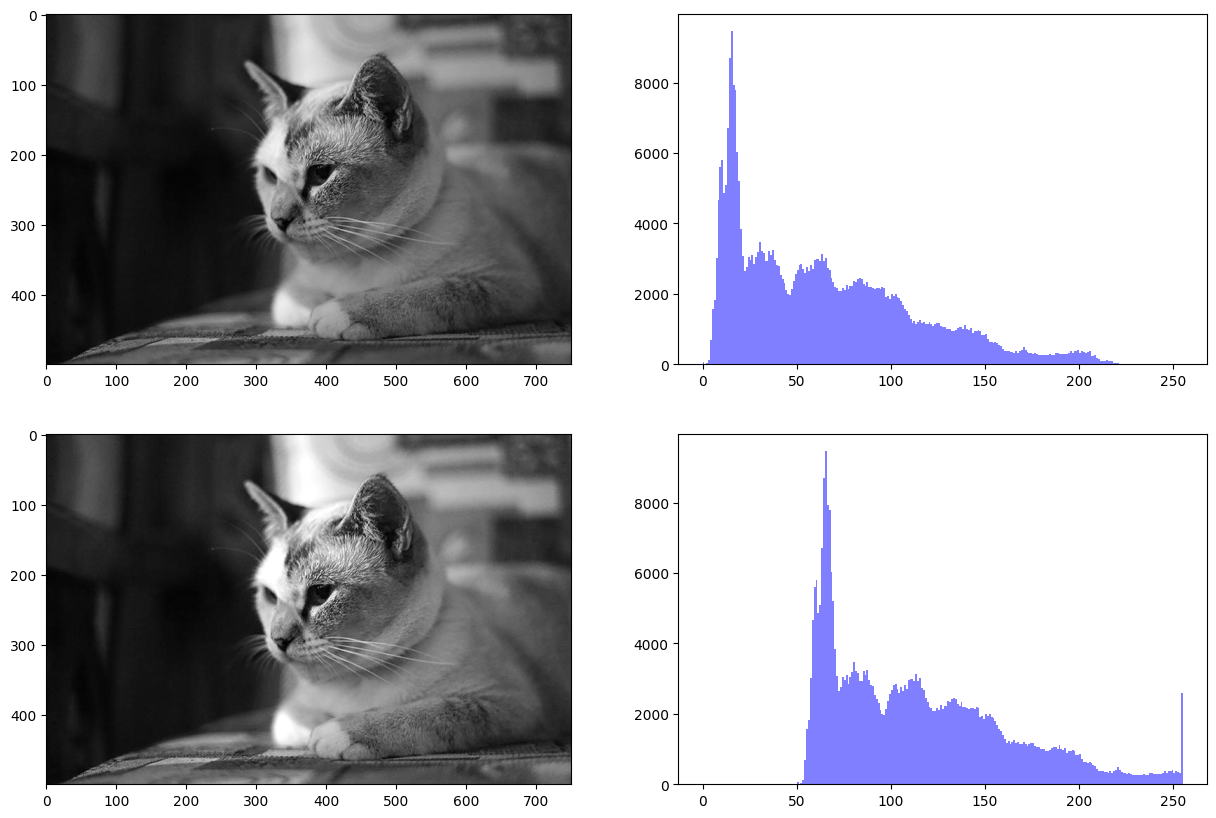

In [3]:
# Image Brightness #
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# Melakukan import c kucing.jpg, dan membaca size nya
cf = Image.open('Kucing_Gray.jpg')
lbr, tgi = (cf.size)

# Wadah pada citra hasil
cg = Image.new('L',(lbr,tgi),(0))

# Operasi pixel sesuai dengan persamaan g(x,y) = f(x,y)+ beta
bta = 50
for x in range(lbr):
    for y in range(tgi):
        fxy = cf.getpixel((x,y))
        gxy = fxy + bta
        cg.putpixel((x,y),(gxy))

# Menyiapkan data histrogram
baki = [] # Array kosong
for x in range (lbr):
    for y in range (tgi):
        piks = cf.getpixel((x,y))
        baki.append(piks)

bakiB = [] # Membuat larik kosong
for x in range (lbr):
    for y in range (tgi):
        pikB= cg.getpixel((x,y))
        bakiB.append(pikB)

## Menampilkan hasil perbaikan citra brigthness
jm_btg = 255
fig, axs = plt.subplots(2, 2, figsize = (15,10))
axs[0, 0].imshow(cf, cmap='gray')
axs[1, 0].imshow(cg, cmap='gray')
axs[0, 1].hist(baki, jm_btg, range=(0, 255), facecolor='blue', alpha = 0.5)
axs[1, 1].hist(bakiB, jm_btg, range=(0, 255), facecolor='blue', alpha = 0.5)

cg.save('Kucing_Gray_Cerah.jpg')
plt.show()

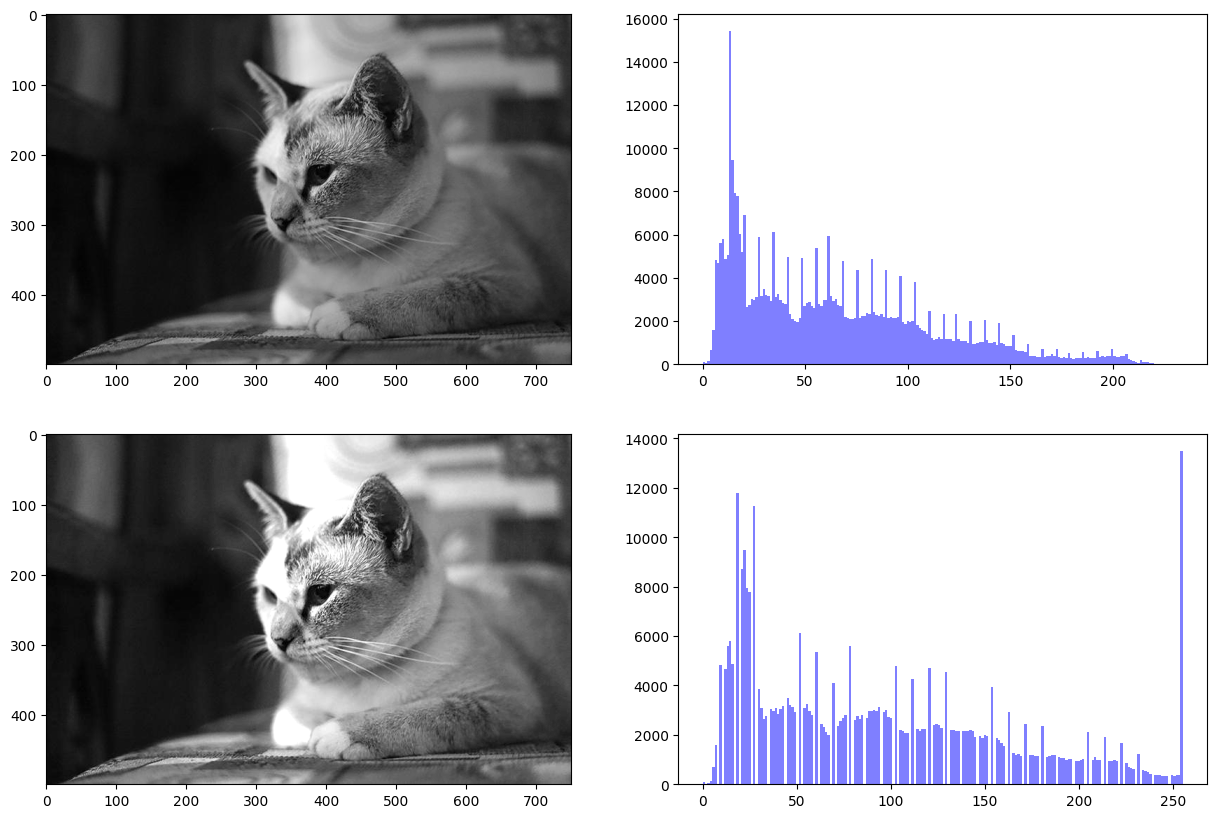

In [4]:
## PERBAIKAN KONTRAS ##
# Persamaan umum g(x,y) = alpha * f(x,y)
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# Melakukan import c kucing.jpg, dan membaca size nya
cf = Image.open('Kucing_Gray.jpg')
lbr, tgi = (cf.size)

# Wadah pada citra hasil
cg = Image.new('L',(lbr,tgi),(0))

# Operasi pixel sesuai dengan persamaan
alp = 1.5
for x in range(lbr):
    for y in range(tgi):
        fxy = cf.getpixel((x,y))
        gxy = int(alp*fxy)
        cg.putpixel((x,y),(gxy))

# Menyiapkan data histrogram

histo = [] # Array kosong
for x in range (lbr):
    for y in range (tgi):
        piks = cf.getpixel((x,y))
        histo.append(piks)

histoB = [] # Membuat larik kosong
for x in range (lbr):
    for y in range (tgi):
        pikB= cg.getpixel((x,y))
        histoB.append(pikB)

## Menampilkan hasil perbaikan citra brigthness
jm_btg = 200
fig, axs = plt.subplots(2, 2, figsize = (15,10))
axs[0, 0].imshow(cf, cmap='gray')
axs[1, 0].imshow(cg, cmap='gray')
axs[0, 1].hist(histo, jm_btg, facecolor='blue', alpha = 0.5)
axs[1, 1].hist(histoB, jm_btg, facecolor='blue', alpha = 0.5)

cg.save('Kucing_Gray_Kontras.jpg')
plt.show()

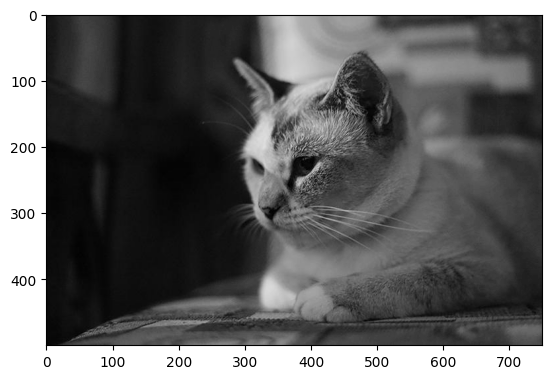

In [6]:
## PERUBAHAN HISTOGRAM ##

# Melakukan import library yang akan digunakan
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Melakukan pengambilan citra
cf = Image.open('Kucing_Gray.jpg')
lbr, tgi = (cf.size)

# Menampilkan histogram citra asli
plt.imshow(cf, cmap='gray', vmin=0 , vmax = 255)
cf.show(cf)

hisku1 = cf.histogram()
L = 256                            # tingkat aras keabuan
n = lbr*tgi                 
alpha = float(L-1)/n               # hasil pembagian jumlah pixel 

# Melakukan Cumulative Density Function pada semua titik pixel
cdf1 = []
c1 = 0
for i in range(L):
    c1 += hisku1[i]
    cdf1.append(c1)

# Pembuatan dan penyederhanaan rumus yang digunakan dan equalisasi
cdf_eq1=[]
for i in range(L):
  #  ak = round(float(L-1)*(cdf1[i]/float(n)))
    ak = float(alpha)*cdf1[i]
    cdf_eq1.append(ak)

# Mapping CDF ke citra input, untuk mendapatkan citra hasil\
cdf_eq2 = np.array(cdf_eq1)
cg = cdf_eq2[cf]

# Menyiapkan histogram citra hasil
hisku2 = np.histogram(cg, L,[0,L])[0]



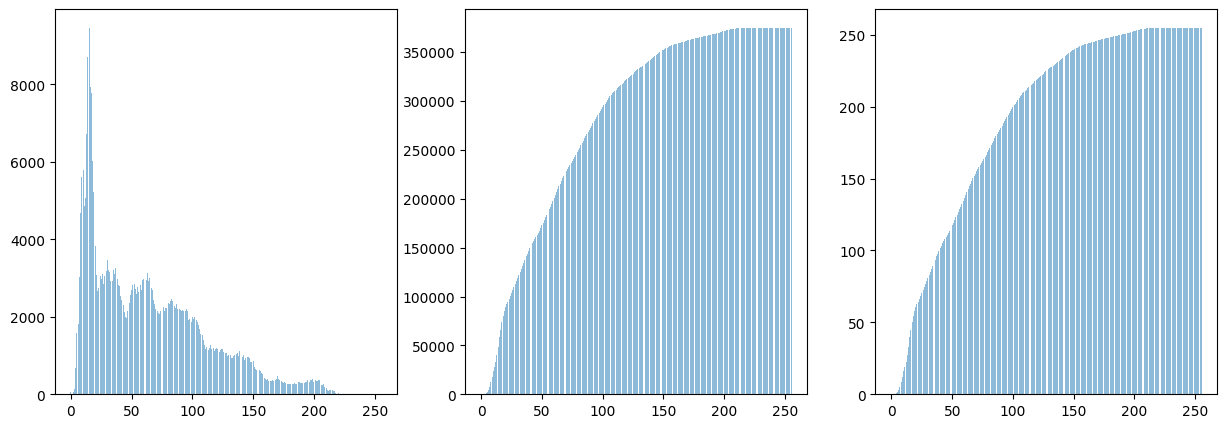

In [7]:
# Menampilkan histogram dalam bentuk diagram batang
jb = range(256)
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].bar(jb, hisku1, alpha=0.5)              #Histogram citra normal 
axs[1].bar(jb, cdf1, alpha=0.5)                #Histogram hasil cdf
axs[2].bar(jb, cdf_eq1, alpha=0.5)             #Histogram hasil equalisasi cdf
# Histogram ketiga yang akan digunakan untuk equalisasi histogram pada 
# langkah selanjutnya
plt.show()

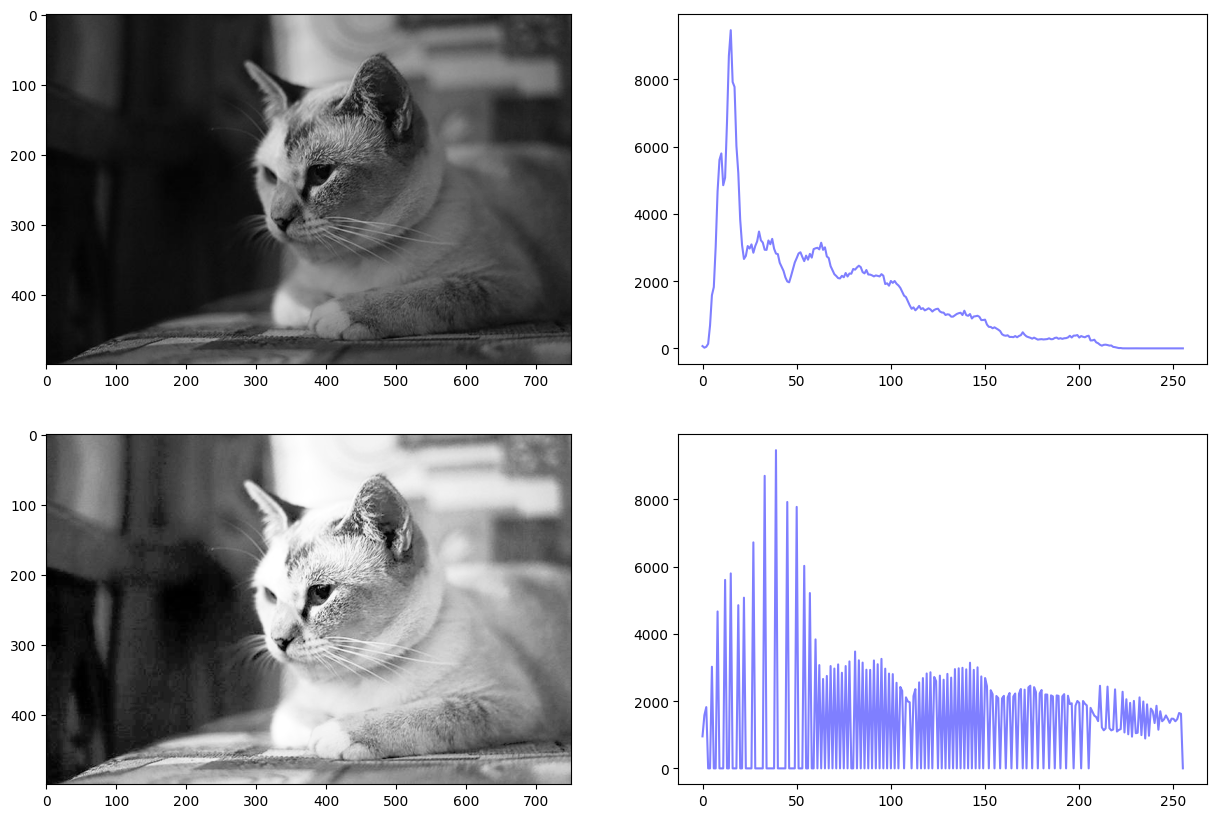

In [8]:
## Menampilkan 
jm_btg = range(256)
fig, axs = plt.subplots(2, 2, figsize = (15,10))
axs[0, 0].imshow(cf, cmap='gray', vmax = 255)
axs[1, 0].imshow(cg, cmap='gray', vmax = 255)
axs[0, 1].plot(jm_btg, hisku1 , color='blue', alpha = 0.5)
axs[1, 1].plot(jm_btg, hisku2 , color='blue', alpha = 0.5)
plt.show()


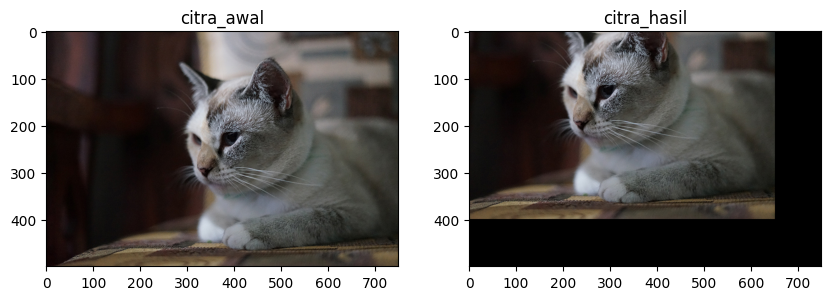

In [9]:
## PERBAIKAN GEOMETRIK ##
# TRANSLASI

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Citra awal
cf = Image.open('Kucing.jpg')
ip = cf.load()

#template sebagai wadah citra baru
cg = Image.new("RGB", cf.size)
draw = ImageDraw.Draw(cg)

#proses transalsi
# Menyiapkan variabel transalsi yang nantinya akan menggeser citra
geserX = 100
geserY = 100

#Operasi translasi
for x in range(cf.width):
    for y in range(cf.height):
        xb = x + (geserX)
        yb = y + (geserY)
        if (xb > 0) and (xb < cf.width) and (yb  < cf.height):
            draw.point((x, y), ip[xb, yb])
        else :
            draw.point((x,y), 0)

# Menampilkan hasil
fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(cf, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("citra_awal")
axs[1].imshow(cg, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("citra_hasil")
plt.show()


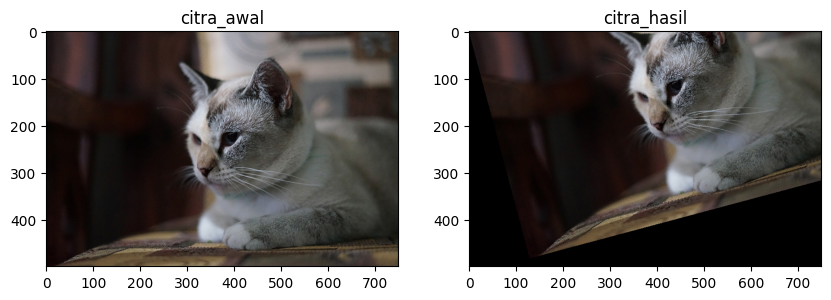

In [10]:
## PERBAIKAN GEOMETRIK ##
# ROTASI

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from math import sin, cos, pi

# Citra awal
cf = Image.open('Kucing.jpg')
ip = cf.load()

#template sebagai wadah citra baru
cg2 = Image.new("RGB", cf.size)
draw = ImageDraw.Draw(cg2)

#proses rotasi
# Menyiapkan rotasi
drj = 15
sudut = drj*(pi/180)

#  Operasi rotasi persamaan WILLIAM K. PRATT
for x in range (cf.width):
    for y in range (cf.height):
        xp = int(x*cos(sudut) - y*sin(sudut))
        yp = int(x*sin(sudut) + y*cos(sudut))
        if 0 <= xp < cf.width and 0 <= yp <  cf.height:
            draw.point((x,y), ip[xp ,yp])

# Menampilkan hasil
fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(cf, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("citra_awal")
axs[1].imshow(cg2, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("citra_hasil")
plt.show()


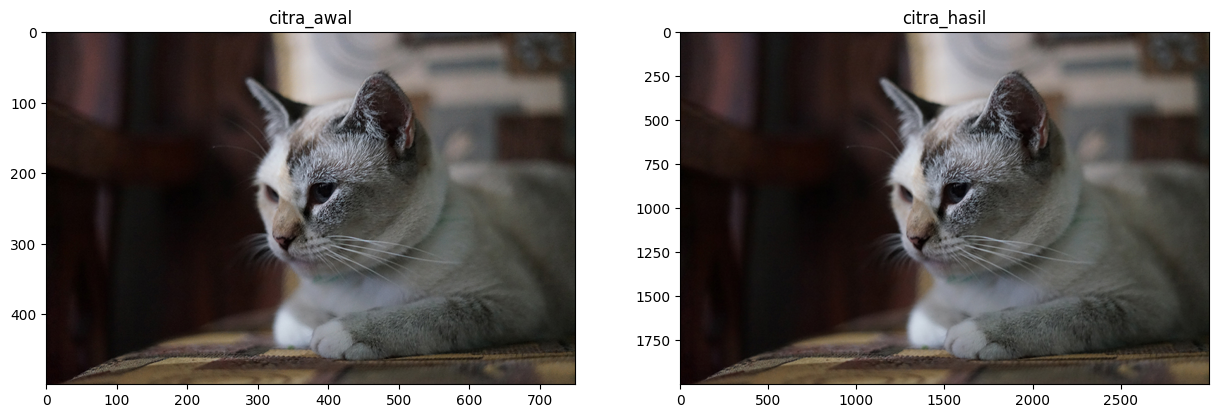

In [11]:
## PERBAIKAN GEOMETRIK ##
# SKALA

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from math import floor

# Citra awal
cf = Image.open('Kucing.jpg')
ip = cf.load()
lbr, tgi = cf.size

#proses skala
# variabel penyekalaan
sx = 4
sy = 4
ubx, uby = int(lbr*sx), int(tgi*sy)

#template sebagai wadah citra baru
cg3 = Image.new("RGB", (ubx, uby))
draw = ImageDraw.Draw(cg3)



#  Operasi penyekalaan
for x in range (cg3.width):
    for y in range (cg3.height):
        xp, yp = floor(x *1/sx) , floor(y * 1/sy)
        draw.point((x,y), ip[xp, yp])

cg3.save('Kucing_Skala.jpg')
# Menampilkan hasil
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(cf, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("citra_awal")
axs[1].imshow(cg3, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("citra_hasil")
plt.show()

Text(0.5, 1.0, 'citra_gaussian')

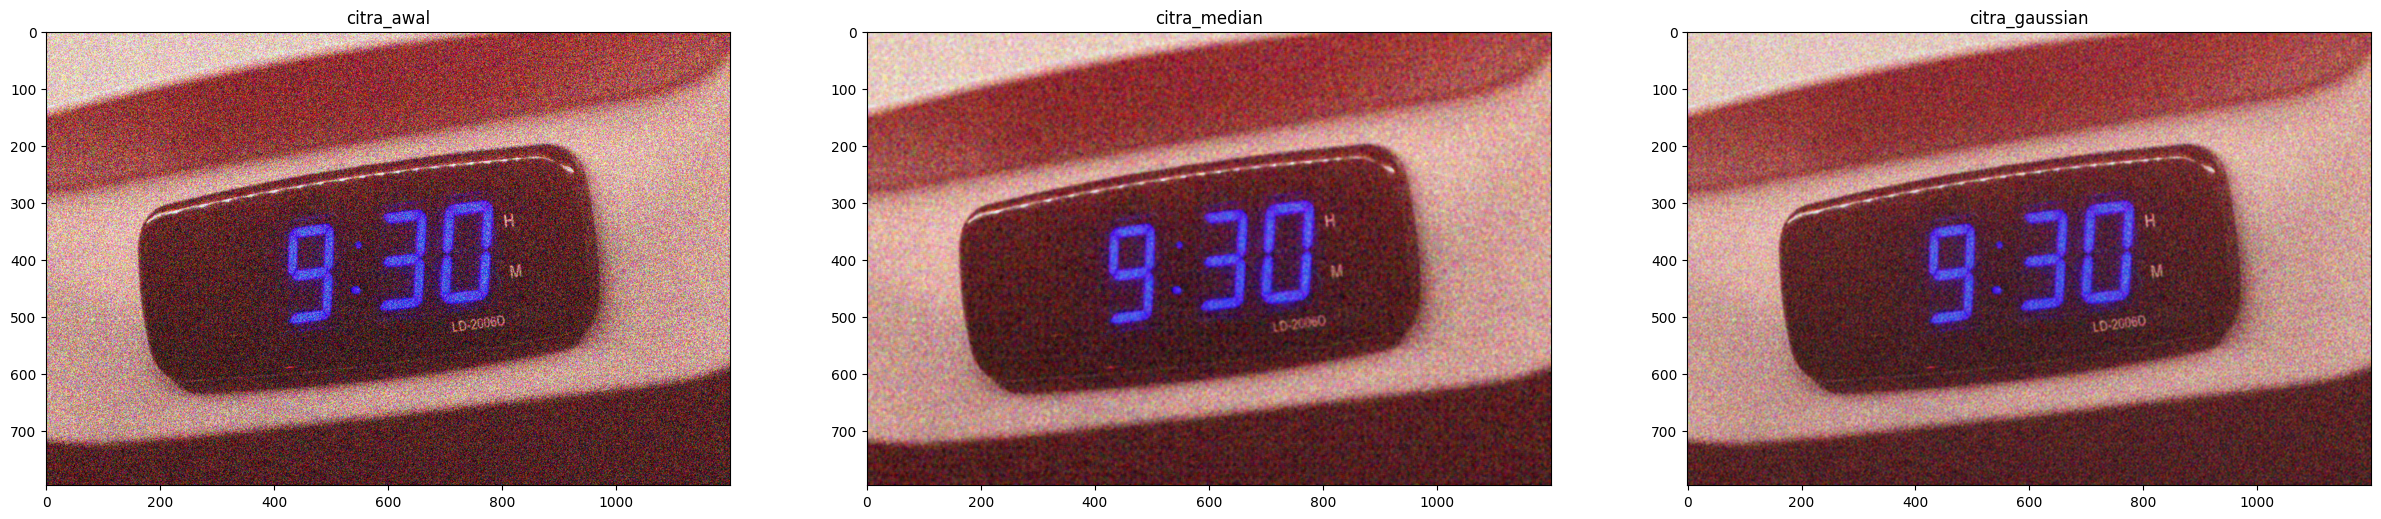

In [12]:
##SMOOTHING CITRA##
#Menggunakan library opencv untuk melakukan operasi, numpy untuk penyimpanan data array
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

#membaca directory file
img = cv2.imread('Jam_Noise.jpg')
#menggunakan fungsi .blur, .gaussian blur dan median blur yang tersedia pada opencv
gaussian = cv2.GaussianBlur(img,(5,5),0)
median = cv2.medianBlur(img,5)

cv2.imwrite('jam_gaussian.jpg',gaussian)
cv2.imwrite('jam_median.jpg',median)

fig, axs = plt.subplots(1, 3, figsize=(30, 30))
axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("citra_awal")
axs[1].imshow(median, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("citra_median")
axs[2].imshow(gaussian, cmap='gray', vmin=0, vmax=255)
axs[2].set_title("citra_gaussian")

Text(0.5, 1.0, 'citra_sharpened')

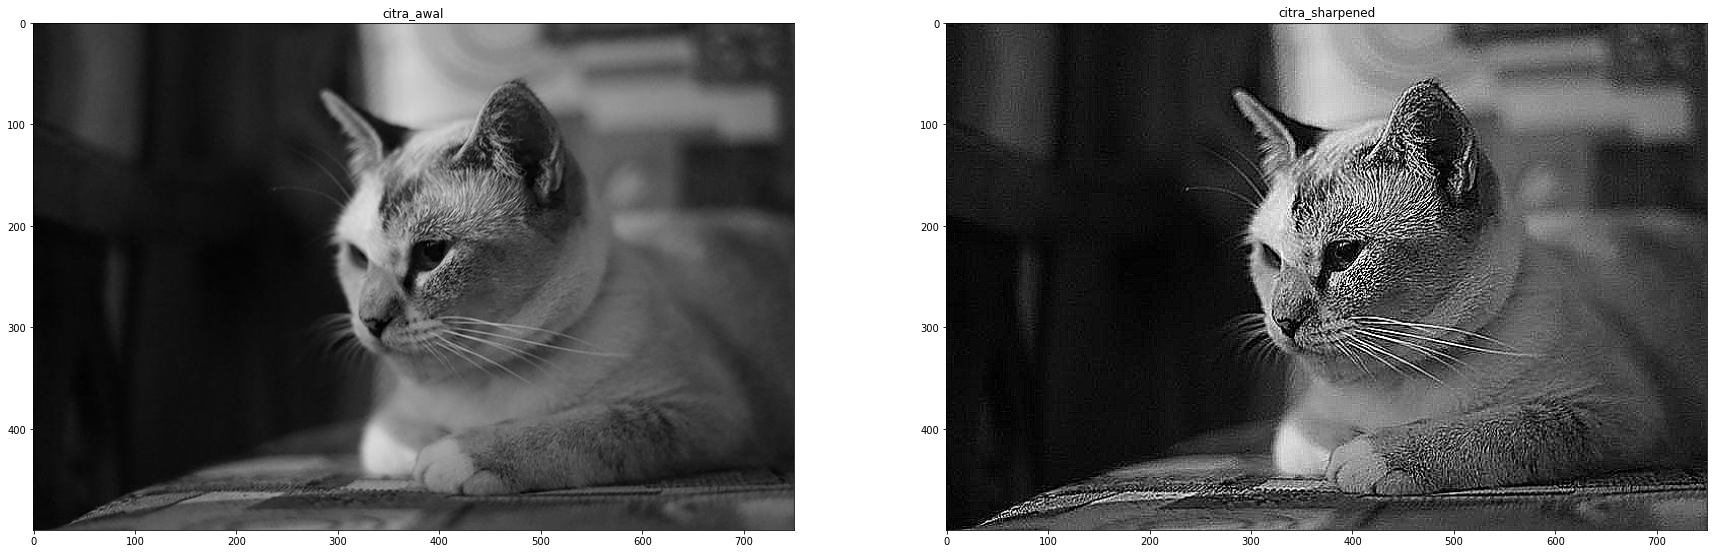

In [6]:
#Sharpening/penajaman citra#
#Menggunakan library opencv untuk melakukan operasi, numpy untuk penyimpanan data array
import cv2
import numpy as np

#membaca directory file gambar
image = cv2.imread('Kucing_Gray.jpg')
#membuat array dan disimpan pada variabel kernel
kernel = np.array([[-1,-1,-1],
                    [-1,9,-1],
                    [-1,-1,-1]])
sharpened = cv2.filter2D(image, -1, kernel)

#menampilkan hasil penajaman citra
fig, axs = plt.subplots(1, 2, figsize=(30, 30))
axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("citra_awal")
axs[1].imshow(sharpened, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("citra_sharpened")
